# NCES Data on D.C school's financial data

In [22]:
import pandas as pd
import numpy as np

from itertools import combinations

! pip install sweetviz 
import sweetviz as sv

## load and process datasets

In [23]:
path = "../Dataset/"

In [24]:
#function for processing the different years of NCES data 
def nces_process(data):

    # get columns we need
    cols = data.columns
    finan_cols =  ['pp_total_raw_DC', 'pp_site_raw_DC', 'pp_centshare_raw_DC', 'schoolstloc_raw_DC', \
                    'schtype_raw_DC']
    other_cols = ['level', 'enroll_raw_DC']
    if 'nces_freelunch' in data:
        other_cols += ['nces_freelunch', 'nces_reducedlunch']
        
    cols_need = list(cols[0:6]) + finan_cols + other_cols
    data = data[cols_need]

    #delete cols have constant value except state and year
    drop_cols = list(data.columns[data.nunique() <= 1])[2:] 
    data = data.drop(drop_cols, axis=1)

    #transfer col to some numeric data and fill null w/ empty value
    num_cols = ['enroll_raw_DC', 'schoolstloc_raw_DC'] + \
                [col for col in data if col.startswith('pp')]
    for col in num_cols:
        data[col] = pd.to_numeric( data[col], errors='coerce')
    

    return data

In [25]:
nces_18_19 = pd.read_excel("../Dataset/NCES/DC_1819.xlsx")
nces_18_19.head()

,state,year,distid_stateassigned,schoolid_stateassigned,distname,schoolname,ncesdistid_admin,ncesdistid_geo,census_id,ncesid,...,distexclu_raw_DC,schtype_raw_DC,ward_raw_DC,countenroll,noaudit,nositecen,adfinvars,distflex,flag_nerds,flag_f33
0,DC,2018-2019,178,233,Academy of Hope Adult PCS,Academy of Hope Adult PCS,NaN,NaN,NaN,NaN,...,721987,Charter,5,1,0,0,0,1,0,0
1,DC,2018-2019,155,217,Achievement Preparatory Academy PCS,Achievement Preparatory Academy PCS - Wahler P...,1100072.0,1100072.0,NaN,1.100072e+11,...,5331797,Charter,8,1,0,0,0,1,0,0
2,DC,2018-2019,155,1100,Achievement Preparatory Academy PCS,Achievement Preparatory Academy PCS - Wahler P...,1100072.0,1100072.0,NaN,1.100072e+11,...,5331797,Charter,8,1,0,0,0,1,0,0
3,DC,2018-2019,103,140,AppleTree Early Learning PCS,AppleTree Early Learning Center PCS - Columbia...,1100054.0,1100054.0,NaN,1.100054e+11,...,7363789,Charter,1,1,0,0,0,1,0,0
4,DC,2018-2019,103,3072,AppleTree Early Learning PCS,AppleTree Early Learning Center PCS - Douglas ...,1100054.0,1100054.0,NaN,1.100054e+11,...,7363789,Charter,8,1,0,0,0,1,0,0


/opt/homebrew/anaconda3/lib/python3.9/site-packages/sweetviz/dataframe_report.py:74: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_source_names = [cur_name for cur_name, cur_series in source_df.iteritems()]
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sweetviz/dataframe_report.py:84: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  all_compare_names = [cur_name for cur_name, cur_series in compare_df.iteritems()]
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sweetviz/dataframe_report.py:109: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  filtered_series_names_in_source = [cur_name for cur_name, cur_series in source_df.iteritems()


                                             |          | [  0%]   00:00 -> (? left)

/opt/homebrew/anaconda3/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sweetviz/series_analyzer_cat.py:28: FutureWarning: iteritems is deprecated and will be removed in a future version. Use .items instead.
  for item in category_counts.iteritems():
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stats["mad"] = series.mad()
/opt/homebrew/anaconda3/lib/python3.9/site-packages/sweetviz/series_analyzer_numeric.py:25: FutureWarning: The 'mad' method is deprecated and will be removed in a future version. To compute the same result, you may do `(df - df.mean()).abs().mean()`.
  stat


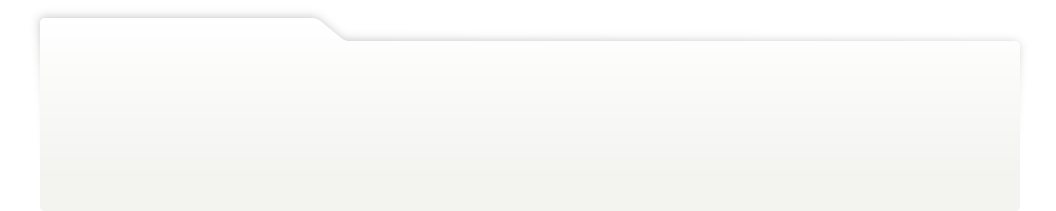
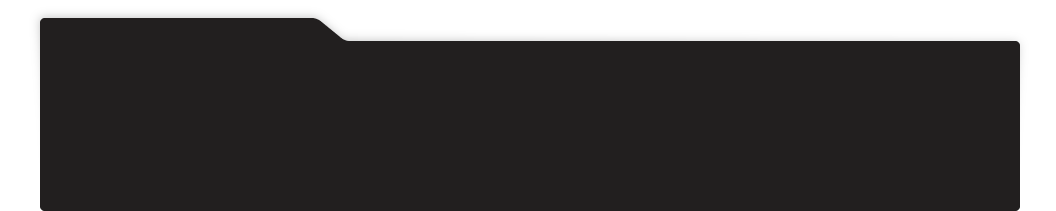
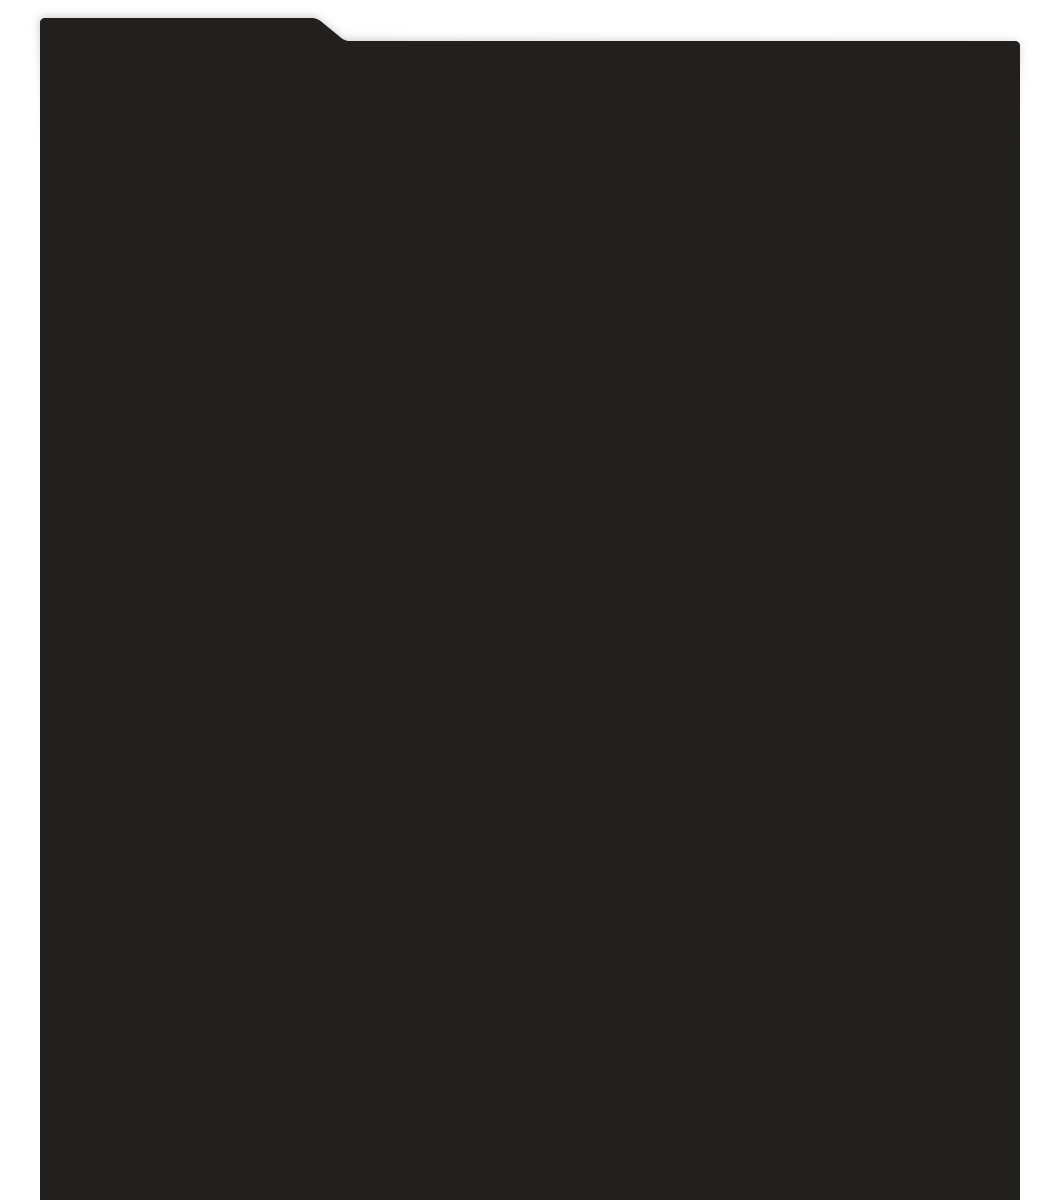
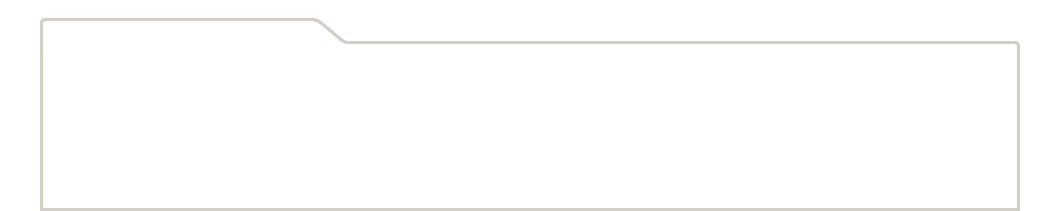
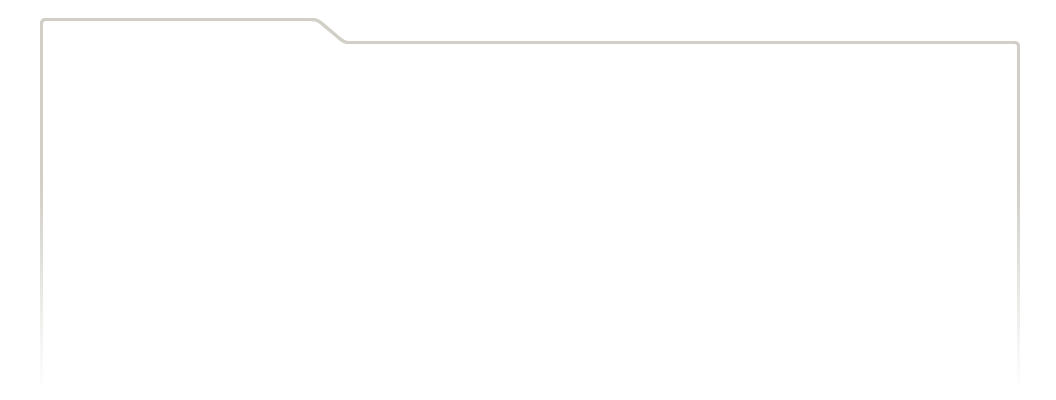
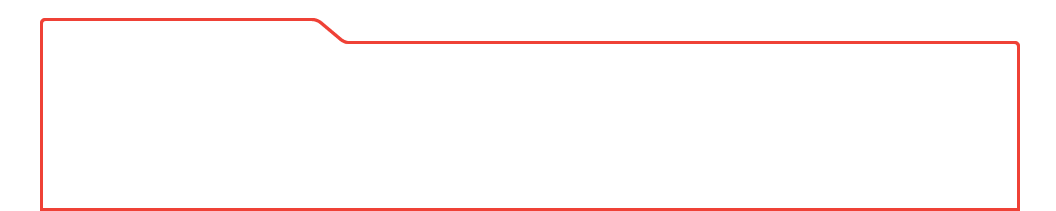
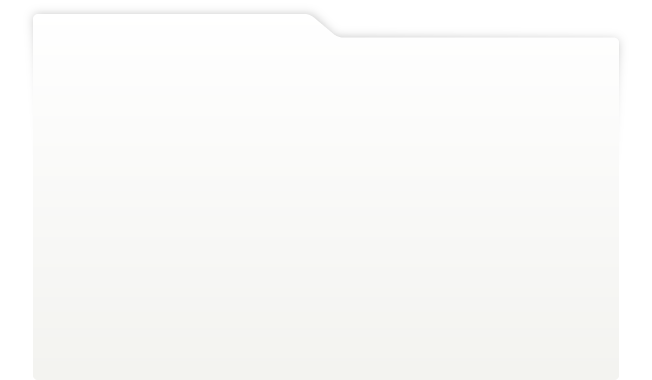
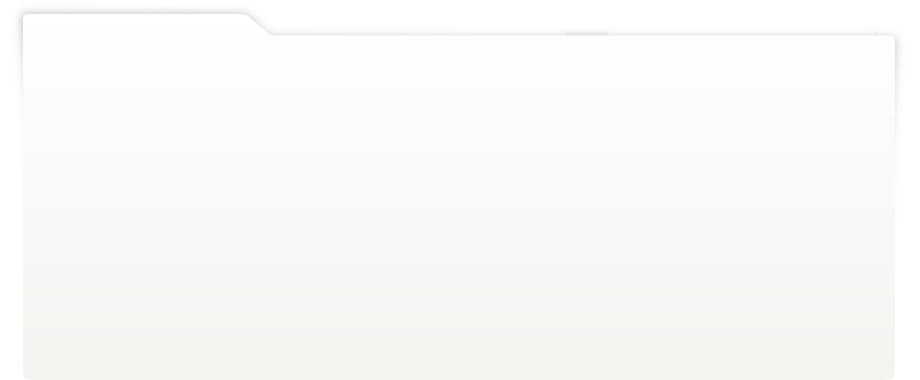
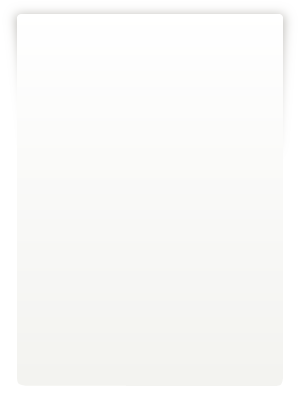
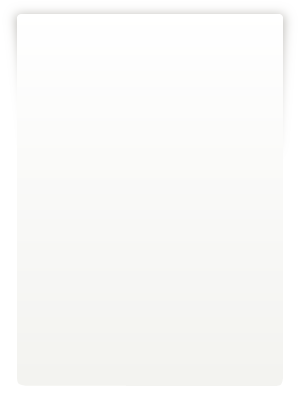
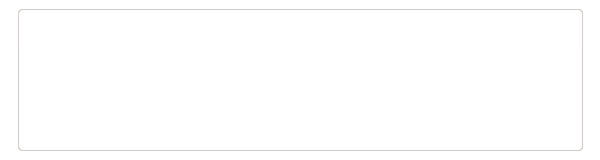
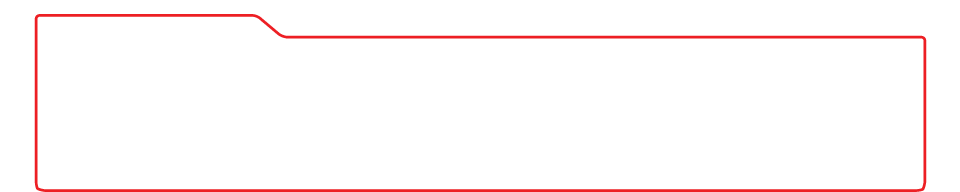
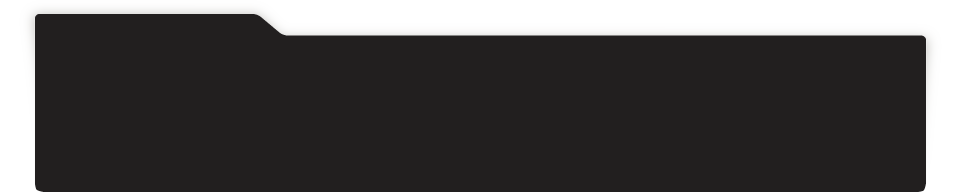
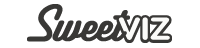
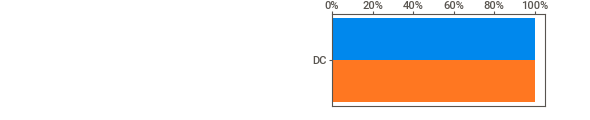
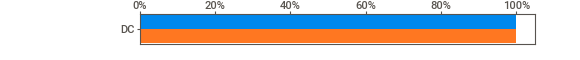
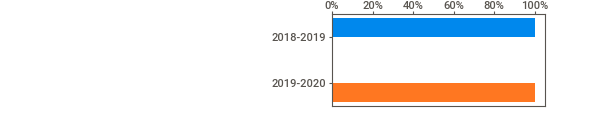
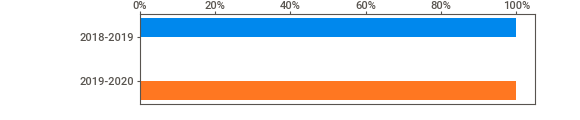
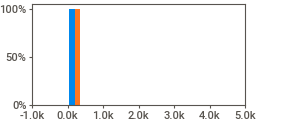
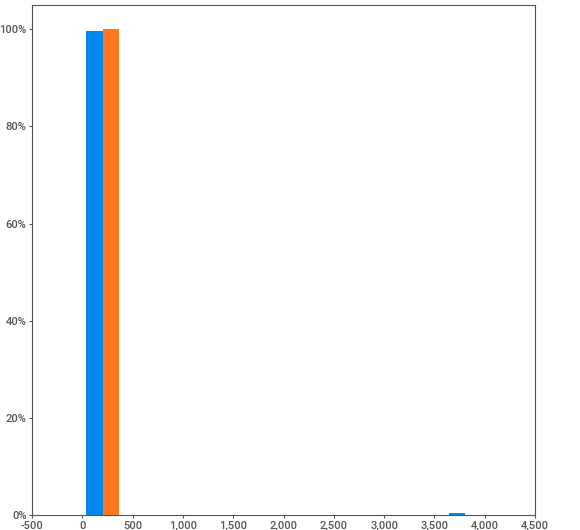
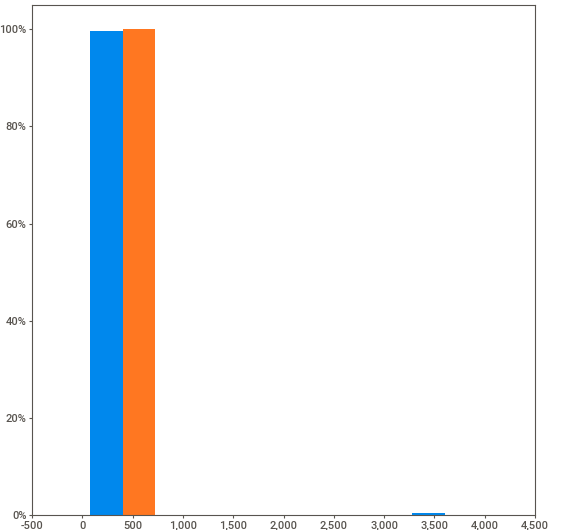
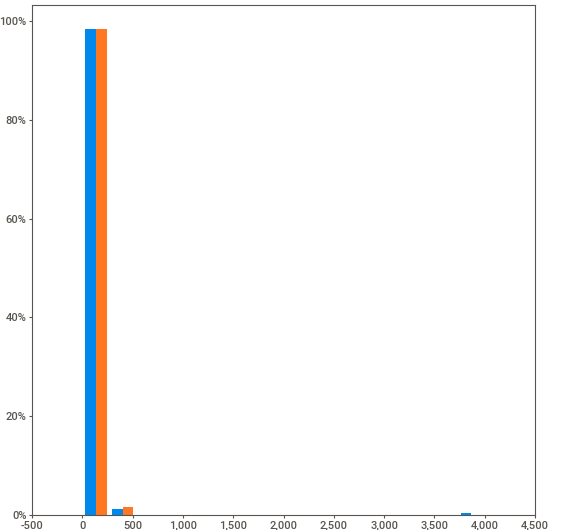
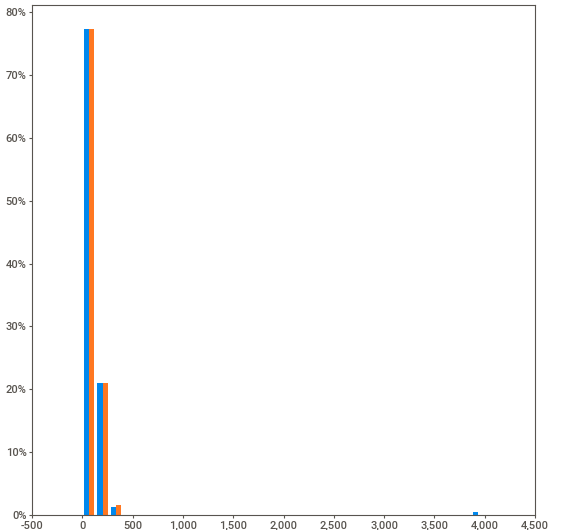
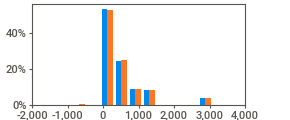
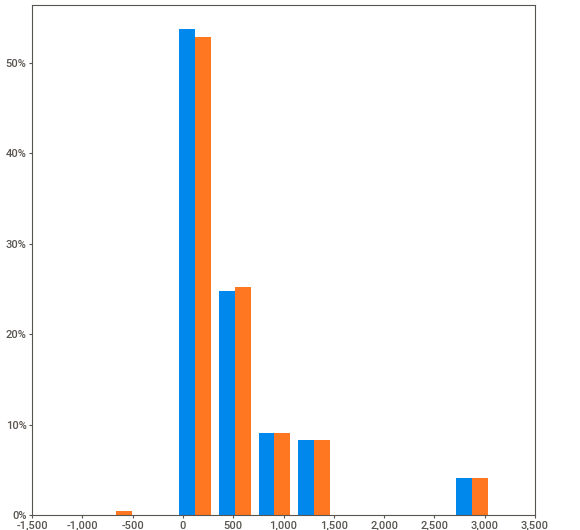
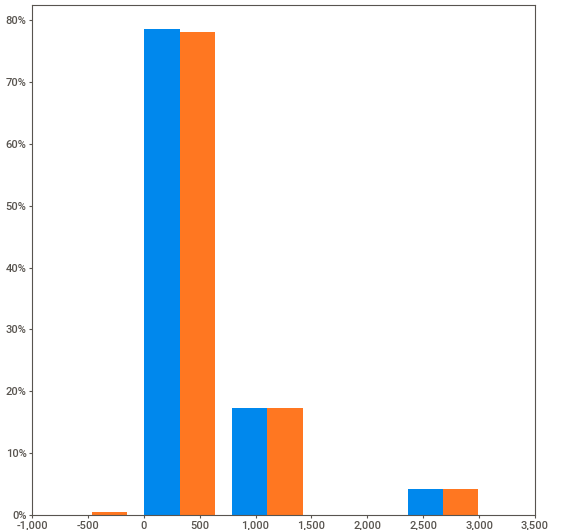
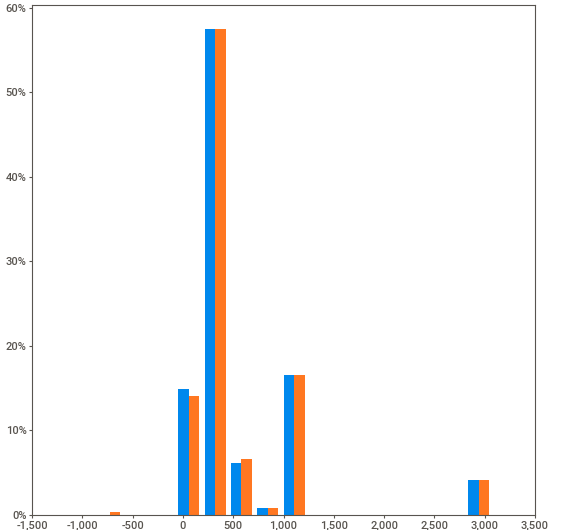
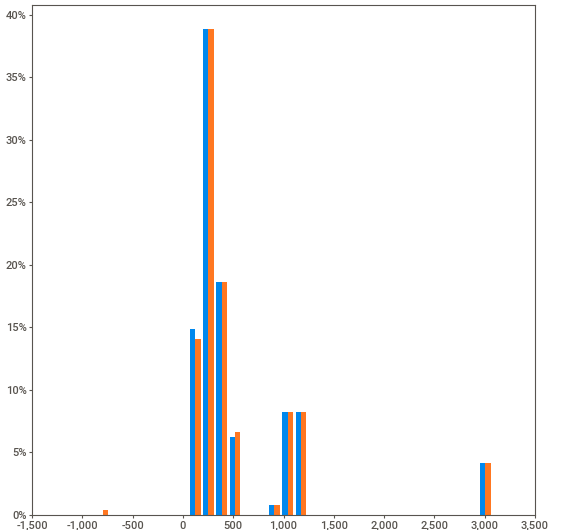
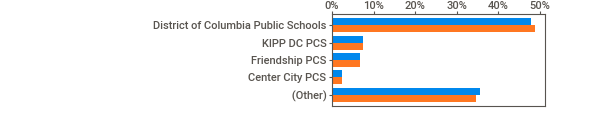
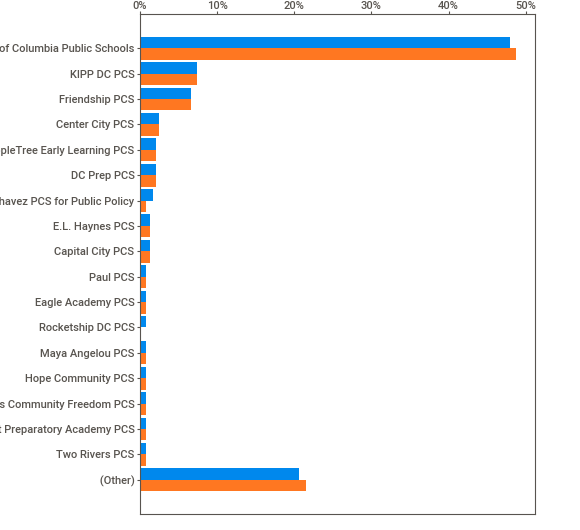
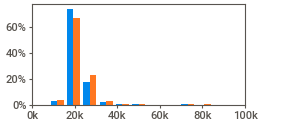
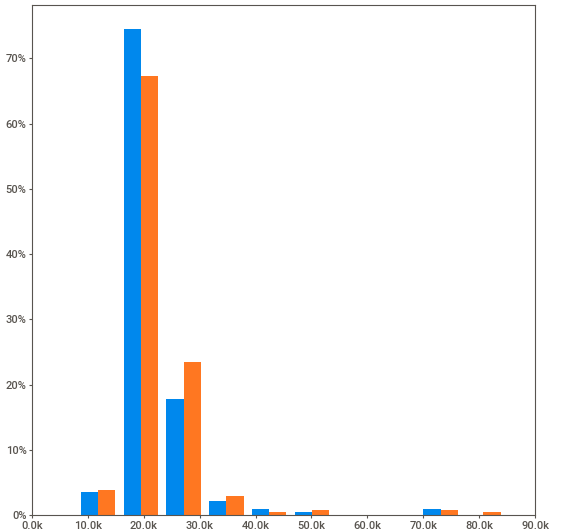
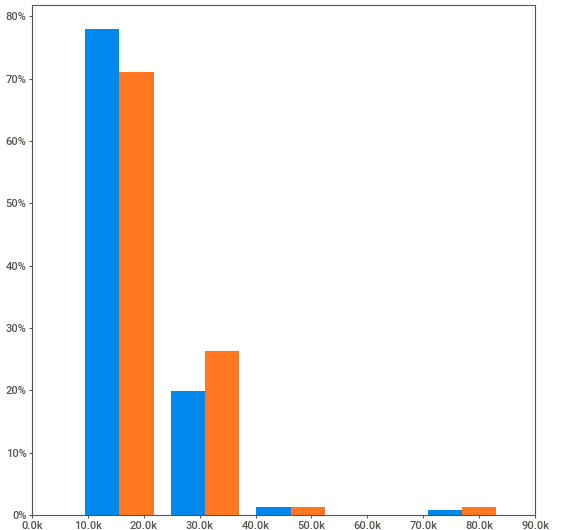
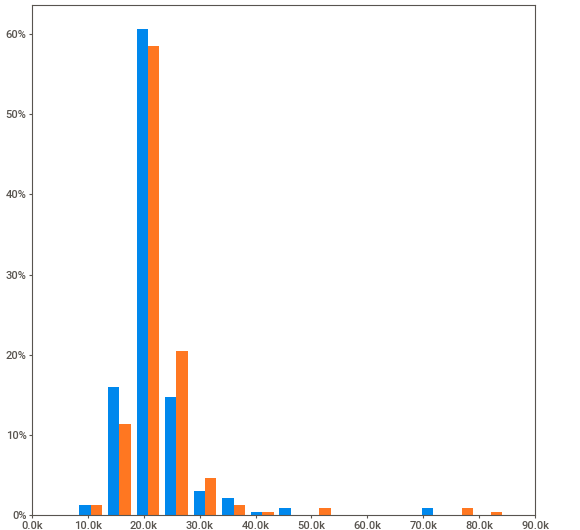
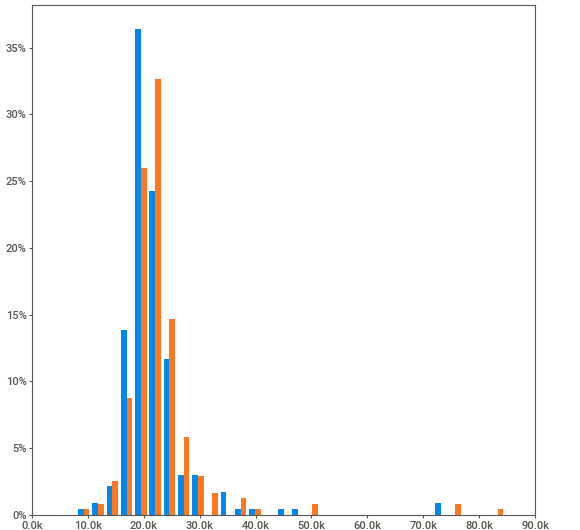
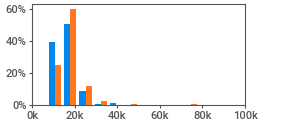
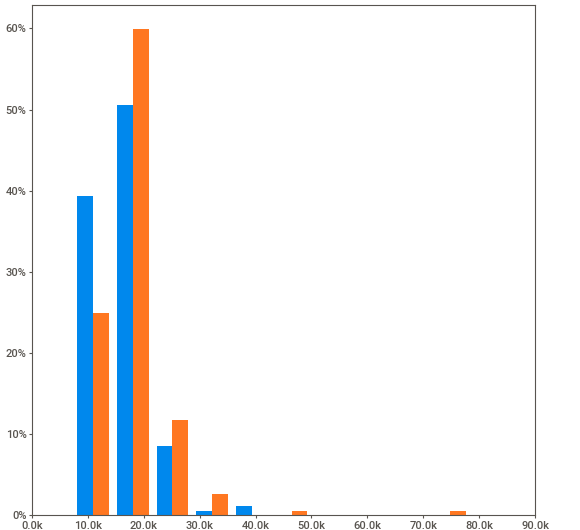
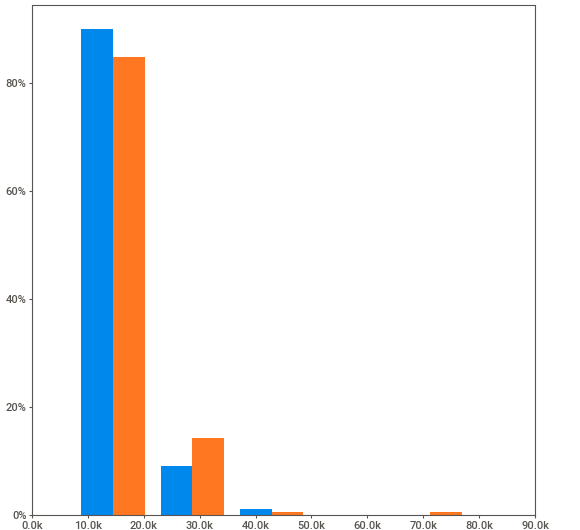
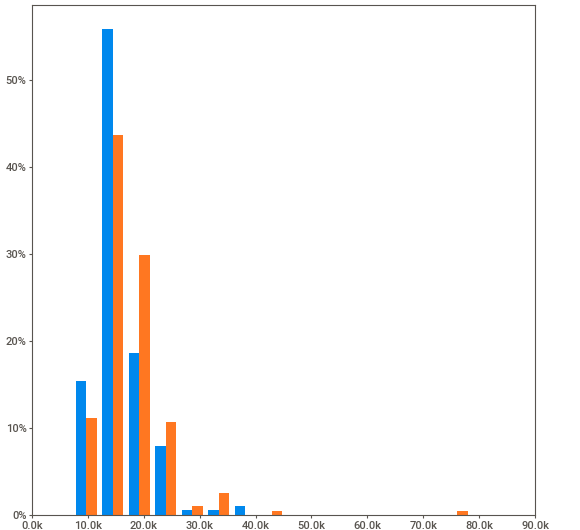
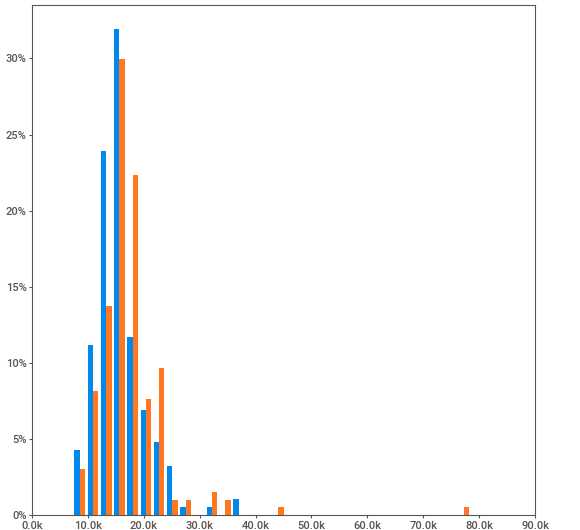
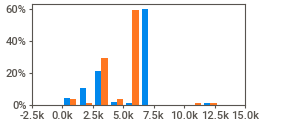
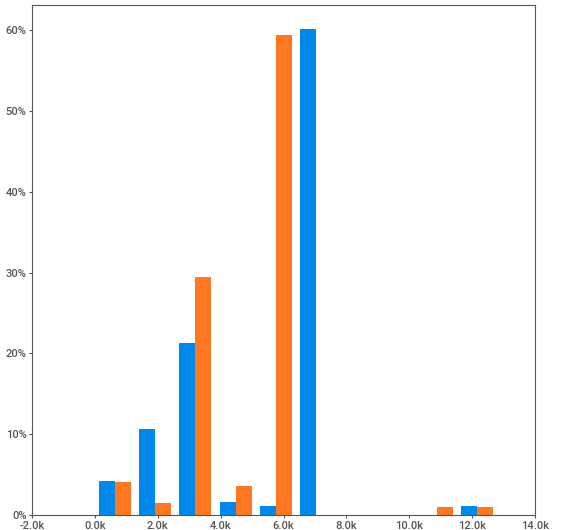
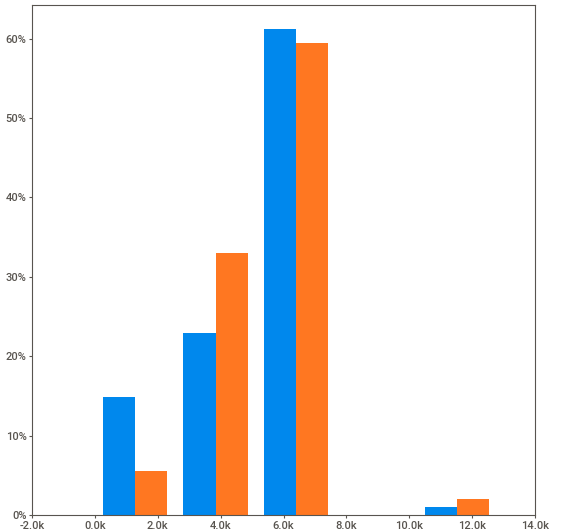
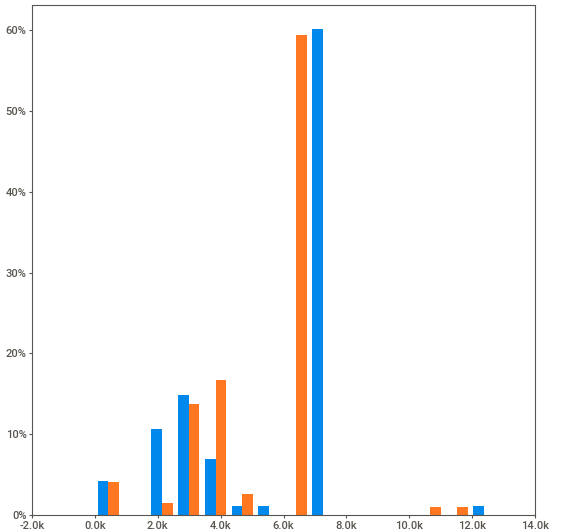
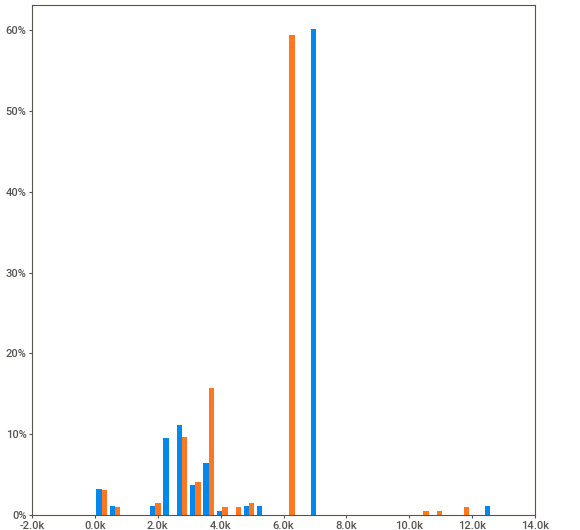
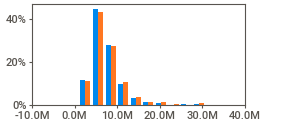
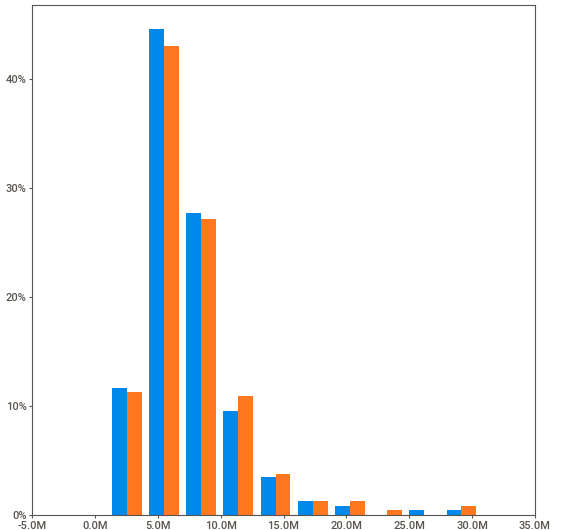
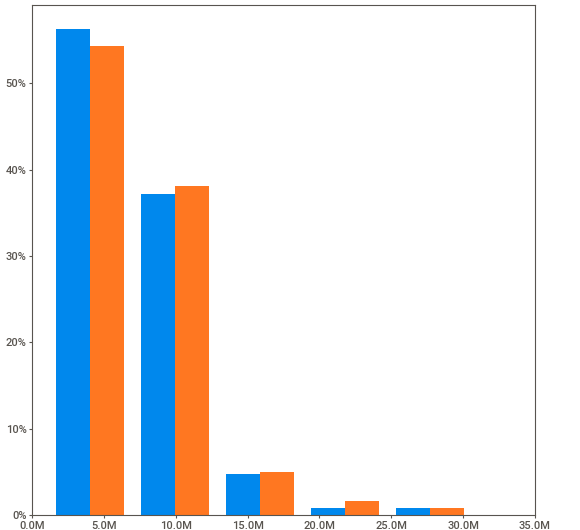
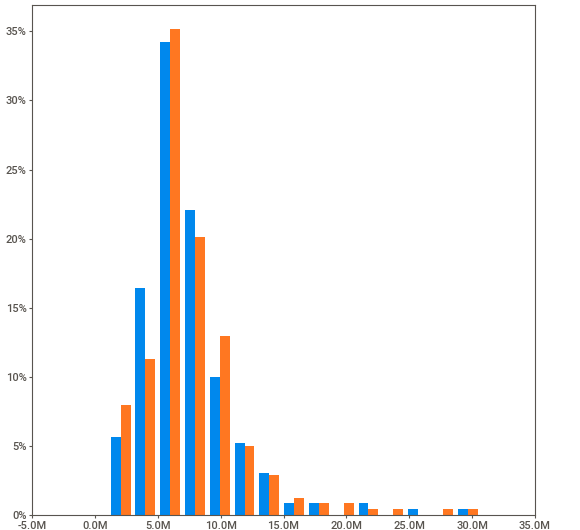
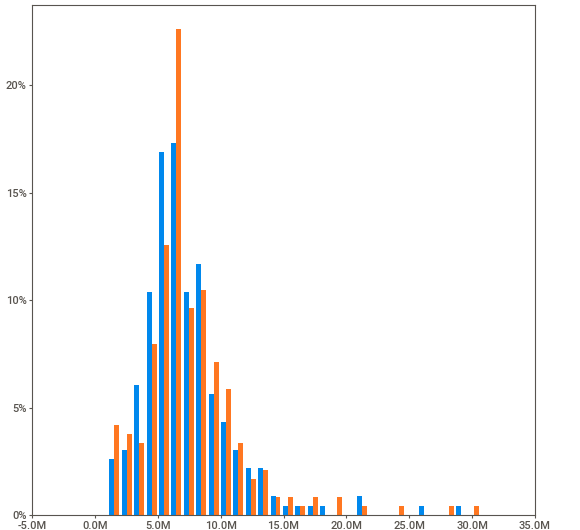
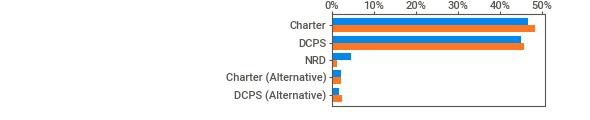
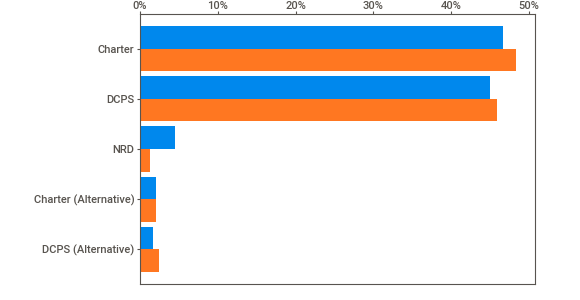
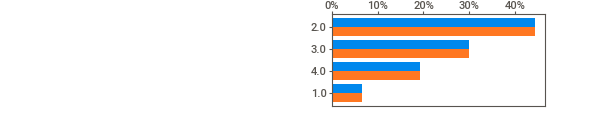
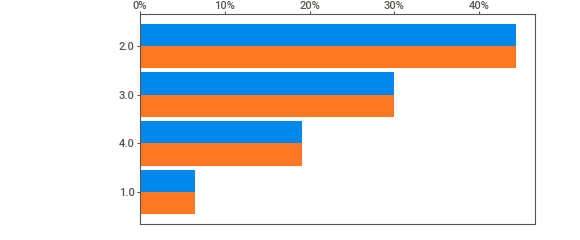
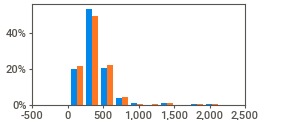
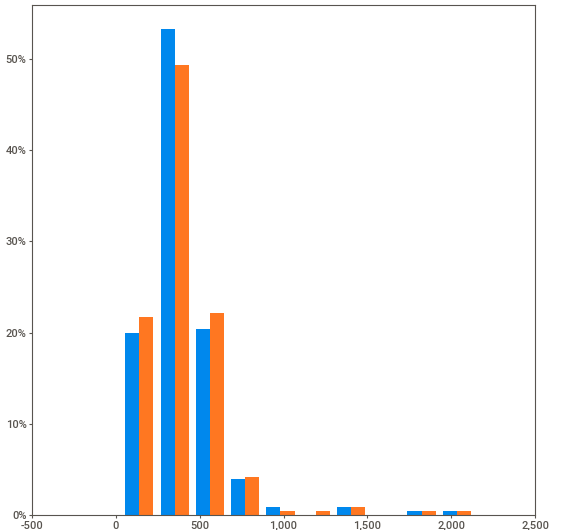
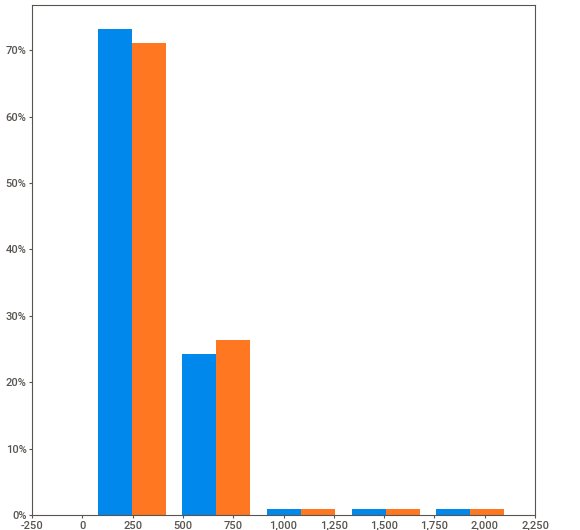
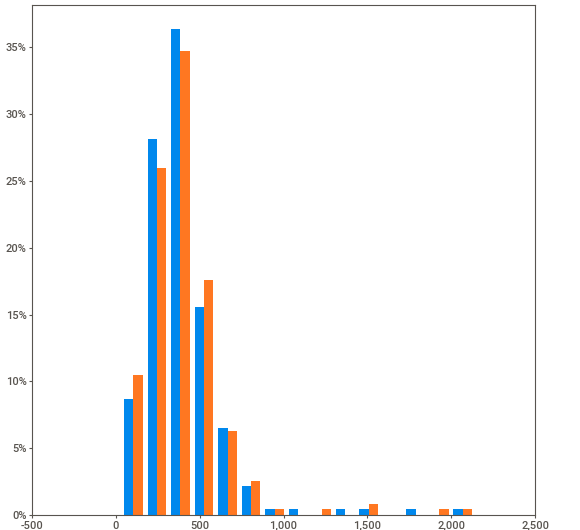
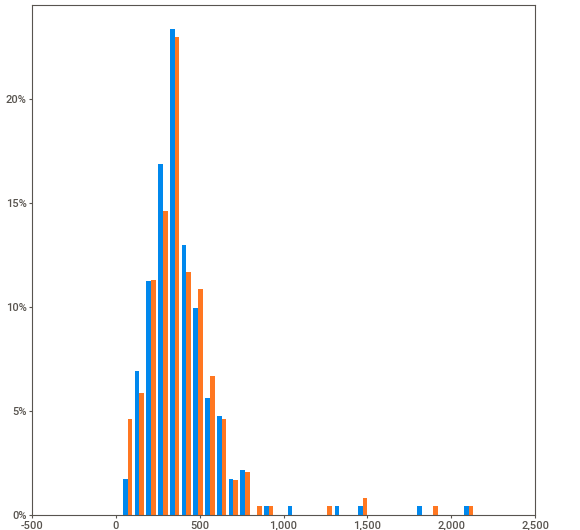
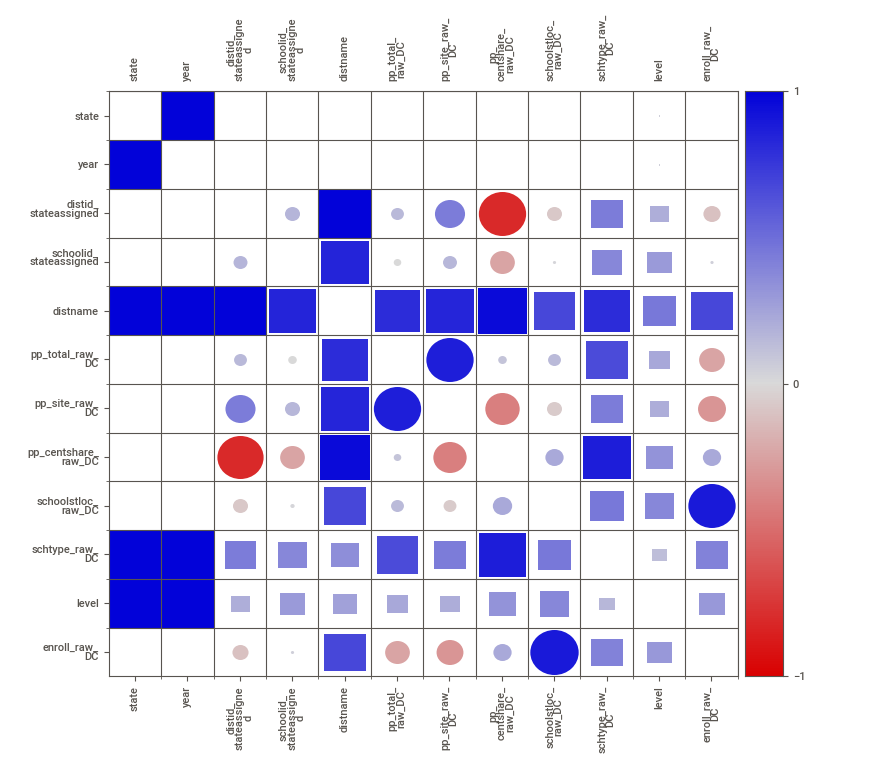
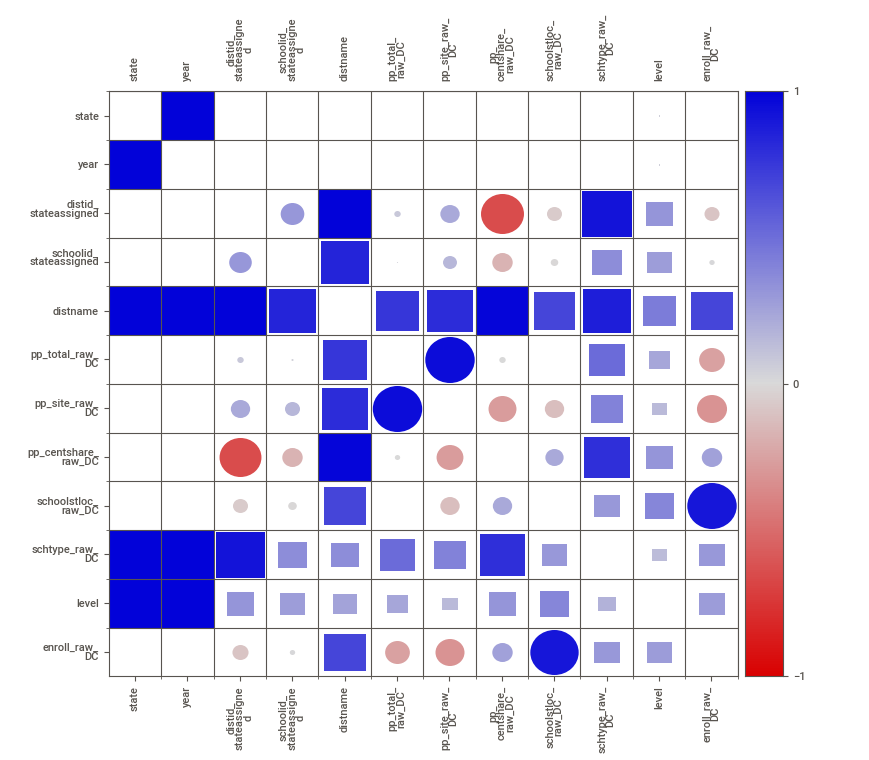

In [26]:
#running datasets through the function

#2018-2019 dataset
nces_1819 = nces_process(nces_18_19)

#2019-2020 dataset
nces_19_20=pd.read_excel("../Dataset/NCES/DC_1920.xlsx")
nces_1920 = nces_process(nces_19_20)
nces_1920.head()

nces_cmp = sv.compare(nces_1819, nces_1920)
nces_cmp.show_notebook()

## Merge Years 

In [27]:
nces = nces_1819.merge(nces_1920, on='schoolid_stateassigned', suffixes=("_1819", "_1920"))
print(nces_1819.shape, nces_1920.shape)
print(nces.shape)
nces.columns

(242, 13) (242, 13)
(239, 25)


Index(['state_1819', 'year_1819', 'distid_stateassigned_1819',
       'schoolid_stateassigned', 'distname_1819', 'schoolname_1819',
       'pp_total_raw_DC_1819', 'pp_site_raw_DC_1819',
       'pp_centshare_raw_DC_1819', 'schoolstloc_raw_DC_1819',
       'schtype_raw_DC_1819', 'level_1819', 'enroll_raw_DC_1819', 'state_1920',
       'year_1920', 'distid_stateassigned_1920', 'distname_1920',
       'schoolname_1920', 'pp_total_raw_DC_1920', 'pp_site_raw_DC_1920',
       'pp_centshare_raw_DC_1920', 'schoolstloc_raw_DC_1920',
       'schtype_raw_DC_1920', 'level_1920', 'enroll_raw_DC_1920'],
      dtype='object')

In [28]:
nces[nces.schtype_raw_DC_1920 != nces.schtype_raw_DC_1819][['schtype_raw_DC_1819', 'schtype_raw_DC_1920']]


,schtype_raw_DC_1819,schtype_raw_DC_1920
42,NRD,DCPS
80,NRD,DCPS
161,NRD,Charter
167,NRD,Charter
168,NRD,Charter
192,NRD,Charter
199,NRD,Charter
206,NRD,Charter
213,NRD,Charter
214,Charter,NRD


In [29]:
nces[nces.schtype_raw_DC_1920 == 'NRD']['schtype_raw_DC_1920'] = np.nan
nces[nces.schtype_raw_DC_1819 == 'NRD']['schtype_raw_DC_1920'] = np.nan
nces['schtype_raw_DC'] = nces['schtype_raw_DC_1819'].fillna(nces['schtype_raw_DC_1920'])
nces['schtype_raw_DC'].isnull().sum()
nces.columns

/var/folders/6b/rd2ymjg519d9fpfk9l0g39f40000gn/T/ipykernel_15835/2013168800.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nces[nces.schtype_raw_DC_1920 == 'NRD']['schtype_raw_DC_1920'] = np.nan
/var/folders/6b/rd2ymjg519d9fpfk9l0g39f40000gn/T/ipykernel_15835/2013168800.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  nces[nces.schtype_raw_DC_1819 == 'NRD']['schtype_raw_DC_1920'] = np.nan


Index(['state_1819', 'year_1819', 'distid_stateassigned_1819',
       'schoolid_stateassigned', 'distname_1819', 'schoolname_1819',
       'pp_total_raw_DC_1819', 'pp_site_raw_DC_1819',
       'pp_centshare_raw_DC_1819', 'schoolstloc_raw_DC_1819',
       'schtype_raw_DC_1819', 'level_1819', 'enroll_raw_DC_1819', 'state_1920',
       'year_1920', 'distid_stateassigned_1920', 'distname_1920',
       'schoolname_1920', 'pp_total_raw_DC_1920', 'pp_site_raw_DC_1920',
       'pp_centshare_raw_DC_1920', 'schoolstloc_raw_DC_1920',
       'schtype_raw_DC_1920', 'level_1920', 'enroll_raw_DC_1920',
       'schtype_raw_DC'],
      dtype='object')

In [30]:
nces = nces.drop(['state_1819', 'distid_stateassigned_1920', 'distname_1920', 'state_1920', 'level_1920', 'schoolname_1920', 'schtype_raw_DC_1819', 'schtype_raw_DC_1920'], axis=1)
nces.rename(columns = {'distid_stateassigned_1819':'distid_stateassigned', 'distname_1819':'distname', 'schoolname_1819': 'schoolname', 'level_1819':'level'}, inplace = True)
col_reorder = ['schoolid_stateassigned', 'schoolname', 'level', 'schtype_raw_DC', 'distid_stateassigned', 'distname', 
               'year_1819','pp_total_raw_DC_1819', 'pp_site_raw_DC_1819',
               'pp_centshare_raw_DC_1819', 'schoolstloc_raw_DC_1819','enroll_raw_DC_1819', 
               'year_1920', 'pp_total_raw_DC_1920',
               'pp_site_raw_DC_1920', 'pp_centshare_raw_DC_1920',
               'schoolstloc_raw_DC_1920',  'enroll_raw_DC_1920']
nces = nces[col_reorder] 

nces.head()

,schoolid_stateassigned,schoolname,level,schtype_raw_DC,distid_stateassigned,distname,year_1819,pp_total_raw_DC_1819,pp_site_raw_DC_1819,pp_centshare_raw_DC_1819,schoolstloc_raw_DC_1819,enroll_raw_DC_1819,year_1920,pp_total_raw_DC_1920,pp_site_raw_DC_1920,pp_centshare_raw_DC_1920,schoolstloc_raw_DC_1920,enroll_raw_DC_1920
0,233,Academy of Hope Adult PCS,NaN,Charter,178,Academy of Hope Adult PCS,2018-2019,14478.0,NaN,NaN,6199570.0,463.0,2019-2020,14670.0,NaN,NaN,5566158.0,486.0
1,217,Achievement Preparatory Academy PCS - Wahler P...,2.0,Charter,155,Achievement Preparatory Academy PCS,2018-2019,22085.0,18270.0,3815.0,7525500.0,375.0,2019-2020,19357.0,8764.0,10593.0,6333696.0,384.0
2,1100,Achievement Preparatory Academy PCS - Wahler P...,3.0,Charter,155,Achievement Preparatory Academy PCS,2018-2019,17575.0,13403.0,4171.0,6951600.0,450.0,2019-2020,21630.0,10708.0,10922.0,6652869.0,361.0
3,140,AppleTree Early Learning Center PCS - Columbia...,1.0,Charter,103,AppleTree Early Learning PCS,2018-2019,20263.0,16917.0,3346.0,2864400.0,154.0,2019-2020,21271.0,17668.0,3603.0,2409036.0,147.0
4,3072,AppleTree Early Learning Center PCS - Douglas ...,1.0,Charter,103,AppleTree Early Learning PCS,2018-2019,19798.0,16453.0,3346.0,1566270.0,90.0,2019-2020,20762.0,17159.0,3603.0,1356805.0,89.0


## Analyze Financial Data between Years

Calculating Percent Change in finances from 2018-2019 to 2019-2020

In [31]:
def cmp_numeric_data(data, col):

    data[col+ '_inc(%)'] = data[[col+'_1819', col+'_1920']].pct_change(axis='columns', periods=-1)[col+'_1819']
    data[col+ '_inc'] = data[col+'_1819'] - data[col+'_1920']
    return data

In [32]:
cmp_columns = ['pp_total_raw_DC', 'pp_site_raw_DC', 'pp_centshare_raw_DC', 'schoolstloc_raw_DC', 'enroll_raw_DC']
for c in cmp_columns:
    nces = cmp_numeric_data(nces, c)
nces.columns

Index(['schoolid_stateassigned', 'schoolname', 'level', 'schtype_raw_DC',
       'distid_stateassigned', 'distname', 'year_1819', 'pp_total_raw_DC_1819',
       'pp_site_raw_DC_1819', 'pp_centshare_raw_DC_1819',
       'schoolstloc_raw_DC_1819', 'enroll_raw_DC_1819', 'year_1920',
       'pp_total_raw_DC_1920', 'pp_site_raw_DC_1920',
       'pp_centshare_raw_DC_1920', 'schoolstloc_raw_DC_1920',
       'enroll_raw_DC_1920', 'pp_total_raw_DC_inc(%)', 'pp_total_raw_DC_inc',
       'pp_site_raw_DC_inc(%)', 'pp_site_raw_DC_inc',
       'pp_centshare_raw_DC_inc(%)', 'pp_centshare_raw_DC_inc',
       'schoolstloc_raw_DC_inc(%)', 'schoolstloc_raw_DC_inc',
       'enroll_raw_DC_inc(%)', 'enroll_raw_DC_inc'],
      dtype='object')

In [33]:
nces[['pp_total_raw_DC_inc(%)', 'pp_total_raw_DC_inc',
       'pp_site_raw_DC_inc(%)', 'pp_site_raw_DC_inc',
       'pp_centshare_raw_DC_inc(%)', 'pp_centshare_raw_DC_inc',
       'schoolstloc_raw_DC_inc(%)', 'schoolstloc_raw_DC_inc',
       'enroll_raw_DC_inc(%)', 'enroll_raw_DC_inc']].head()

,pp_total_raw_DC_inc(%),pp_total_raw_DC_inc,pp_site_raw_DC_inc(%),pp_site_raw_DC_inc,pp_centshare_raw_DC_inc(%),pp_centshare_raw_DC_inc,schoolstloc_raw_DC_inc(%),schoolstloc_raw_DC_inc,enroll_raw_DC_inc(%),enroll_raw_DC_inc
0,-0.013088,-192.0,NaN,NaN,NaN,NaN,0.113797,633412.0,-0.047325,-23.0
1,0.140931,2728.0,1.084665,9506.0,-0.639857,-6778.0,0.188169,1191804.0,-0.023438,-9.0
2,-0.187471,-4055.0,0.251681,2695.0,-0.618110,-6751.0,0.044903,298731.0,0.246537,89.0
3,-0.047388,-1008.0,-0.042506,-751.0,-0.071329,-257.0,0.189023,455364.0,0.047619,7.0
4,-0.046431,-964.0,-0.041145,-706.0,-0.071329,-257.0,0.154381,209465.0,0.011236,1.0


In [34]:
nces.to_csv("../Dataset/final_data/nces.csv")